<a href="https://colab.research.google.com/github/shahbazkhan20/Playstore-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


### **Reading both CSV Files From Drive and storing in dataframe**

In [ ]:
ps_file_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/Play Store Data.csv'
ur_file_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/User Reviews.csv'
ps_df = pd.read_csv(ps_file_path)
ur_df = pd.read_csv(ur_file_path)

# **Exploring Dataset**

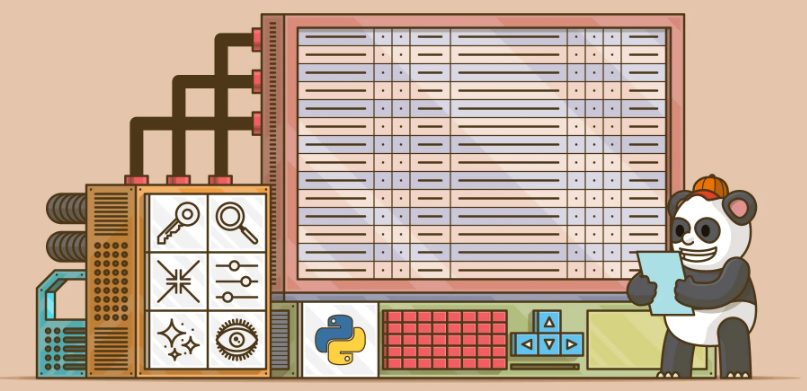

In [ ]:
# Shape of the play store dataframe.
ps_df.shape

(10841, 13)

In [ ]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Converting
* Reviews
* Size
* Installs
* Price 

to numeric.

In [ ]:
#Checking how many values are not numeric in Reviews column in the Data Frame.
ps_df[~ps_df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In index number 10472 values are incorrectly filled in the dataframe. Correcting the data as per the values present in the dataframe.

In [ ]:
ps_df['Category'][10472] = np.nan
ps_df['Rating'][10472] = 1.9
ps_df['Reviews'][10472] = 19
ps_df['Size'][10472] = '3.0M' 
ps_df['Installs'][10472] = '1000+'
ps_df['Type'][10472] = 'Free'
ps_df['Price'][10472] = 0
ps_df['Content Rating'][10472] = 'Everyone'
ps_df['Genres'][10472] = np.nan
ps_df['Last Updated'][10472] = 'February 11, 2018'
ps_df['Current Ver'][10472] = '1.0.19'
ps_df['Android Ver'][10472] = '4.0 and up'

print(ps_df.iloc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                            1000+
Type                                                 Free
Price                                                 0.0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                          2018-02-11 00:00:00
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
#Converting Reviews column to int type from object.
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [ ]:
#Checking the unique values
ps_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#Converting all the data to Mb
for data in ps_df['Size']:
  if 'k' in str(data):
    new_data = float(data[:-1])/1000
    ps_df['Size'] = ps_df['Size'].replace(data,new_data)
  elif 'M' in str(data):
    new_data = float(data[:-1])
    ps_df['Size'] = ps_df['Size'].replace(data,new_data)

In [ ]:
#Converting Size column to numeric/float type
ps_df['Size'] = ps_df['Size'].replace("Varies with device",np.nan)
ps_df['Size'] = pd.to_numeric(ps_df['Size'])

In [ ]:
#Converting Price column to numeric/float type
ps_df['Price'] = pd.to_numeric(ps_df['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#Converting Installs column to numeric/float type.
ps_df['Installs'] = ps_df['Installs'].str.replace('+','')
ps_df['Installs'] = pd.to_numeric(ps_df['Installs'].str.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#Converting data in Last Updated column from string to Timestamp.
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'])
ps_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10840.000000
mean,4.191513,4.441119e+05,21.514505,1.546291e+07,1.027368
std,0.515735,2.927629e+06,22.588343,8.502557e+07,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **Cleaning The Data**

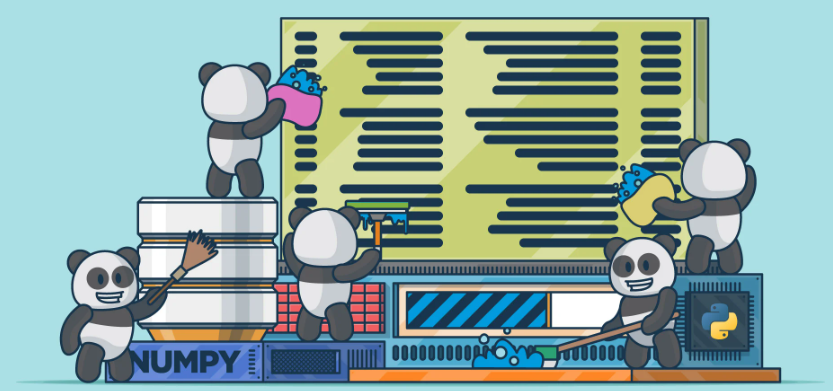

In [ ]:
ps_df.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64